# Importing the libraries

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing

## reading the data set

In [337]:
df = pd.read_csv('customer .csv',sep=',',encoding="utf-8")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [338]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data reprocessing :

### checking the Duplicated Values

In [340]:
df.duplicated().sum()

0

In [341]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

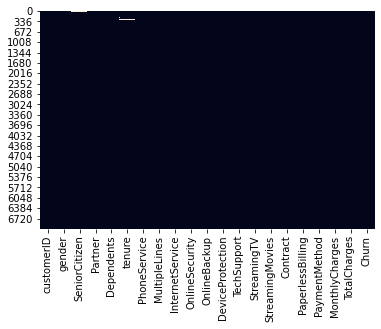

In [342]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [343]:
df['tenure'].describe()

count    6896.000000
mean       33.041473
std        24.382260
min         1.000000
25%        10.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [344]:
df['SeniorCitizen'].describe()

count    7000.000000
mean        0.163143
std         0.369522
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [345]:
df['SeniorCitizen'].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

## fill the missing values 

In [346]:
fill={'SeniorCitizen':1,'tenure':df['tenure'].mean()}
fill

{'SeniorCitizen': 1, 'tenure': 33.04147331786543}

In [347]:
df=df.fillna(fill)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1.0,Yes,No,33.041473,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,1.0,No,No,34.000000,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,1.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,1.0,No,No,45.000000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,1.0,No,No,2.000000,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.000000,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.000000,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.000000,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## the rate of churn 

In [348]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [349]:
np.unique(df["Churn"])

array(['No', 'Yes'], dtype=object)

## TARGET (y) VS DATA (x)

The Churn Rate of Telecom Company: 26.54 %


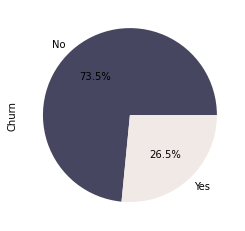

In [350]:
churn_rate  = round((df[df.Churn == "Yes"].shape[0] / df.shape[0])*100, 2)
round(df['Churn'].value_counts()/df.shape[0]*100,2).plot.pie(colors=["#464660","#F1E9E5"], autopct="%1.1f%%")
print('The Churn Rate of Telecom Company:', churn_rate, '%')

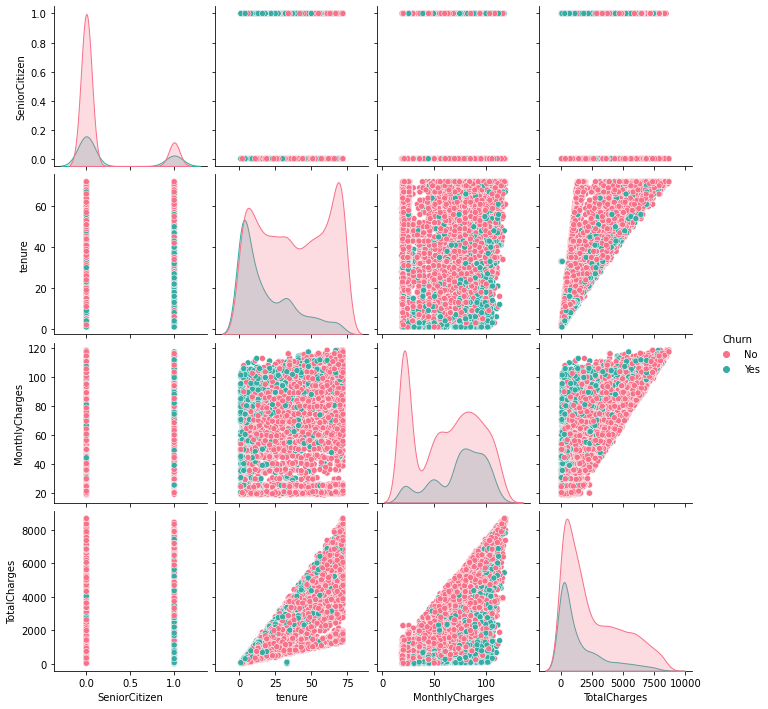

In [351]:
sns.pairplot(df,hue="Churn",palette="husl")

### Feature Selection

# the rate of dependents 

In [352]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:ylabel='Dependents'>

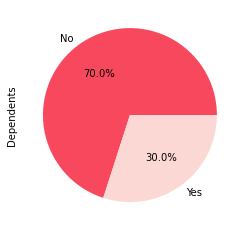

In [353]:
round(df['Dependents'].value_counts()/df.shape[0]*100,2).plot.pie(colors=["#F8485E","#FCD8D4"], autopct="%1.1f%%")

##  Dependents vs. Churn


In [354]:
p = df.query('Churn == "Yes" and Dependents == "No"').shape[0] / df.query('Dependents == "No"').shape[0]
p_1 = df.query('Churn == "Yes" and Dependents == "Yes"').shape[0] / df.query('Dependents == "Yes"').shape[0]
print('P(Churn | ~Dependents) =', round(p, 2),'%')
print('P(Churn | Dependents) =', round(p_1, 2),'%')

P(Churn | ~Dependents) = 0.31 %
P(Churn | Dependents) = 0.15 %


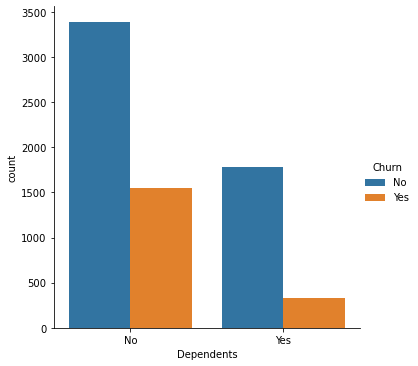

In [355]:
sns.catplot(data=df, kind="count", x="Dependents", hue="Churn")

## gendre rate :

<AxesSubplot:ylabel='gender'>

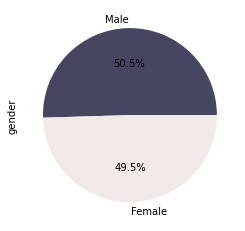

In [356]:
round(df["gender"].value_counts()/df.shape[0]*100,2).plot.pie(colors=["#464660","#F1E9E5"],autopct= '%1.1f%%')

In [357]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

## gender vs churn

In [358]:
p = df.query('Churn == "Yes" and gender == "Male"').shape[0] / df.query('gender == "Male"').shape[0]
p_1 = df.query('Churn == "Yes" and gender == "Female"').shape[0] / df.query('gender == "Female"').shape[0]
print('P(Churn | ~gender) =', round(p, 2),'%')
print('P(Churn | gender) =', round(p_1, 2),'%')

P(Churn | ~gender) = 0.26 %
P(Churn | gender) = 0.27 %


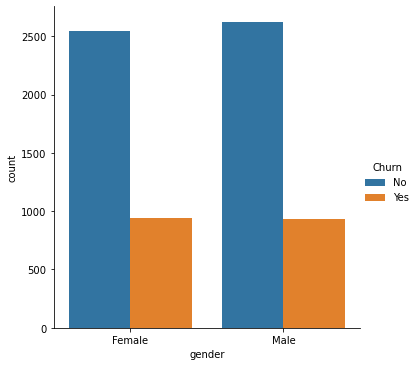

In [359]:
sns.catplot(data=df, kind="count", x="gender", hue="Churn")

# tenure

<AxesSubplot:ylabel='StreamingMovies'>

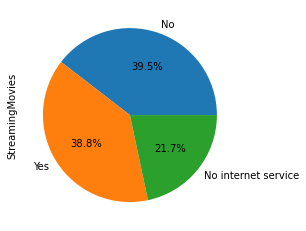

In [118]:
round(df["StreamingMovies"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

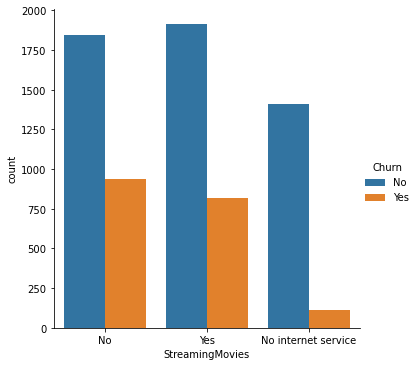

In [119]:
sns.catplot(data=df, kind="count", x="StreamingMovies", hue="Churn")

### Feature Selection

In [120]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [121]:
columns = ['gender','tenure','Partner','Dependents','TotalCharges','StreamingMovies','Churn']

df = df[columns]
df.head()

,gender,tenure,Partner,Dependents,TotalCharges,StreamingMovies,Churn
0,Female,33.041473,Yes,No,29.85,No,No
1,Male,34.000000,No,No,1889.50,No,No
2,Male,2.000000,No,No,108.15,No,Yes
3,Male,45.000000,No,No,1840.75,No,No
4,Female,2.000000,No,No,151.65,No,Yes


In [122]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Label Ecoding

### determining data with type "object" : 

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
def encoding_obJect(data):
    object_data=data.select_dtypes(include=['object'])
    les={}
    for i in object_data.columns :
        les[i]=LabelEncoder()
        data[i]=les[i].fit_transform(df[i])

In [125]:
encoding_obJect(df)
df

<ipython-input-124-149c2259f946>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=les[i].fit_transform(df[i])


,gender,tenure,Partner,Dependents,TotalCharges,StreamingMovies,Churn
0,0,33.041473,1,0,29.85,0,0
1,1,34.000000,0,0,1889.50,0,0
2,1,2.000000,0,0,108.15,0,1
3,1,45.000000,0,0,1840.75,0,0
4,0,2.000000,0,0,151.65,0,1
...,...,...,...,...,...,...,...
7038,1,24.000000,1,1,1990.50,2,0
7039,0,72.000000,1,1,7362.90,2,0
7040,0,11.000000,1,1,346.45,0,0
7041,1,4.000000,1,0,306.60,0,1


## normalize the other data

In [126]:
def normalize(col):
    return(df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [127]:
df['tenure'] = normalize('tenure')

<ipython-input-127-e0f173b5c9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure'] = normalize('tenure')


In [128]:
df['TotalCharges'] = normalize('TotalCharges')

<ipython-input-128-5a2ac02f5f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = normalize('TotalCharges')


In [129]:
df.head()

,gender,tenure,Partner,Dependents,TotalCharges,StreamingMovies,Churn
0,0,0.451288,1,0,0.001275,0,0
1,1,0.464789,0,0,0.215867,0,0
2,1,0.014085,0,0,0.010310,0,1
3,1,0.619718,0,0,0.210241,0,0
4,0,0.014085,0,0,0.015330,0,1


## Correlation Matrix

Text(5, 12.3, 'Correlation Matrix')

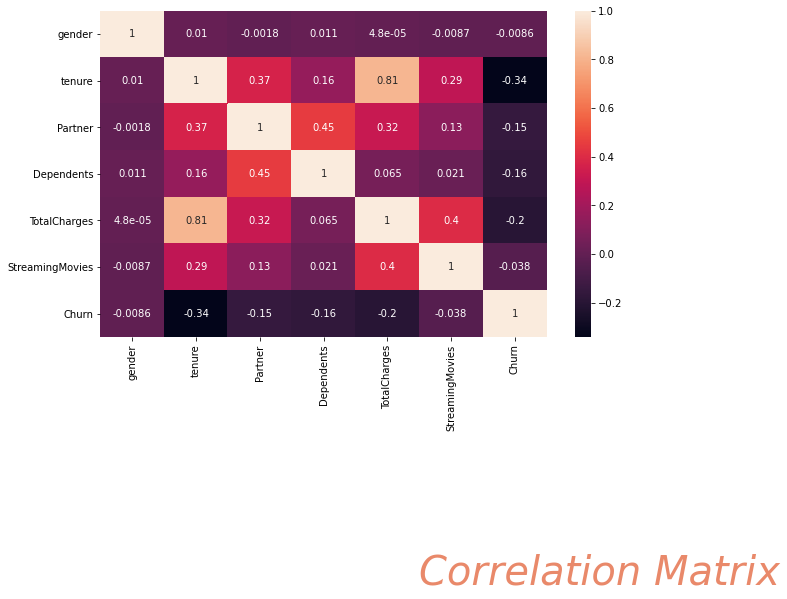

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar = True, annot =True )
plt.text(5,12.3, "Correlation Matrix", fontsize = 40, color='#E9896A', fontstyle='italic')

### Train - Test Split


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X = df.drop('Churn',axis=1).values
Y = df['Churn'].values

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30,random_state=30)

In [134]:
X_train.shape

(4930, 6)

In [135]:
X_test.shape

(2113, 6)

# Modeling


### logistic regression:

In [136]:
from sklearn.linear_model import LogisticRegression


In [137]:
LL = LogisticRegression(solver='liblinear')
LL.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [138]:
LL.score(X_train,y_train)                                     # accuracy for X_train,y_train

0.7649087221095334

In [139]:
LL.score(X_test,y_test)                                     # accuracy for X_test,y_test

0.7368670137245622

##  Prediction


In [140]:
y_predict=LL.predict(X_test)

In [141]:
new_user1 =[0, 0.29, 1, 0, 0.25, 2]

In [142]:
new_user_2=[1, 0.2, 0, 1, 0.75, 1]

In [143]:
LL.predict_proba([new_user1])

array([[0.57553775, 0.42446225]])

In [144]:
LL.predict_proba([new_user_2])

array([[0.3120505, 0.6879495]])

## Confusion matrix

In [145]:
from sklearn import metrics


In [146]:
conf_mat = metrics.confusion_matrix(y_test,y_predict)
print(conf_mat)

[[1421   78]
 [ 478  136]]


In [147]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y = y_test
x = X_test
y= np.array(y)
class_names = np.unique(y)
print(class_names)
confusion_matrices = [
                      ( " SVM", confusion_matrix(y_test,LL.predict(X_test)) )
                      
                     ]

def draw_confusion_matrices(confusion_matrices, class_names):
    labels = list(class_names)

    for cm in confusion_matrices:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm[1])
        plt.title('Confusion Matrix\n(%s)\n' % cm[0])
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        for i,j in ((x,y) for x in range(len(cm[1])) for y in range(len(cm[1][0]))):
            ax.annotate(str(cm[1][i][j]), xy=(i,j), color='red')
        plt.show()



[0 1]


<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


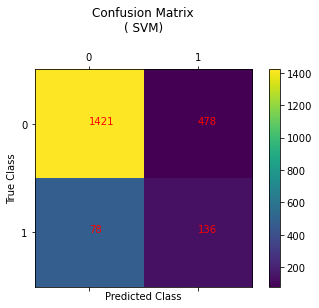

In [148]:
draw_confusion_matrices(confusion_matrices, class_names)

## calculate the accuracy , pression , recall 

In [149]:
accuracy = metrics.accuracy_score(y_test,y_predict)                      
Recall = metrics.recall_score(y_test,y_predict)
precision = metrics.precision_score(y_test,y_predict)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.737
Recall  = 0.221
Precision   = 0.636


## KNN Alogrithm :

In [150]:
from sklearn.neighbors import KNeighborsClassifier


In [151]:
knn = KNeighborsClassifier(n_neighbors = 4)
 
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [152]:
knn.score(X_train,y_train)

0.8344827586206897

In [153]:
knn.score(X_test,y_test)

0.7458589682915286

In [154]:
knn.predict_proba([new_user1])

array([[1., 0.]])

In [155]:
knn.predict_proba([new_user_2])

array([[1., 0.]])

## Confusion matrix

In [156]:
conf_mat = metrics.confusion_matrix(y_test,knn.predict(X_test))
print(conf_mat)

[[1395  104]
 [ 433  181]]


In [210]:
confusion_matrices = [
                      ( " KNN", conf_mat )
                      
                     ]

<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


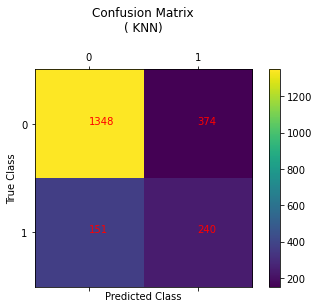

In [211]:
draw_confusion_matrices(confusion_matrices, class_names)

In [158]:
accuracy = metrics.accuracy_score(y_test,knn.predict(X_test))                      
Recall = metrics.recall_score(y_test,knn.predict(X_test))
precision = metrics.precision_score(y_test,knn.predict(X_test))
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.746
Recall  = 0.295
Precision   = 0.635


## SVM Algorithm :

In [159]:
from sklearn.svm import SVC

In [160]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [161]:
svm.score(X_test,y_test)

0.7274017983909133

In [162]:
svm.score(X_train,y_train)

0.7632860040567951

In [214]:
conf_mat = metrics.confusion_matrix(y_test,svm.predict(X_test))
print(conf_mat)

[[1445   54]
 [ 522   92]]


In [215]:
confusion_matrices = [
                      ( " SVM", conf_mat )
                      
                     ]

<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


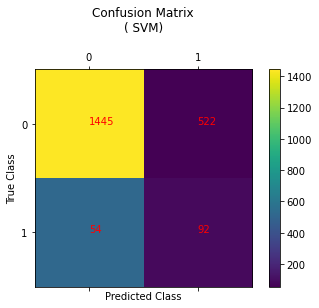

In [216]:
draw_confusion_matrices(confusion_matrices, class_names)

In [165]:
accuracy = metrics.accuracy_score(y_test,svm.predict(X_test))                      
Recall = metrics.recall_score(y_test,svm.predict(X_test))
precision = metrics.precision_score(y_test,svm.predict(X_test))
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.727
Recall  = 0.15
Precision   = 0.63


## Naive Bayes Algorithm

In [166]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [167]:
gnb.fit(X_train,y_train)

GaussianNB()

In [168]:
gnb.score(X_train,y_train)

0.6961460446247465

In [169]:
gnb.score(X_test,y_test)

0.7008991954566967

In [217]:
conf_mat = metrics.confusion_matrix(y_test,gnb.predict(X_test))
print(conf_mat)

[[1129  370]
 [ 262  352]]


In [171]:
accuracy = metrics.accuracy_score(y_test,gnb.predict(X_test))                      
Recall = metrics.recall_score(y_test,gnb.predict(X_test))
precision = metrics.precision_score(y_test,gnb.predict(X_test))
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.701
Recall  = 0.573
Precision   = 0.488


In [218]:
confusion_matrices = [
                      ( "Naive Bayes", conf_mat )
                      
                     ]

<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


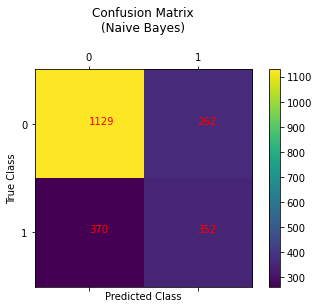

In [219]:
draw_confusion_matrices(confusion_matrices, class_names)

## Decision Tree Classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
dt=DecisionTreeClassifier(max_depth=4,max_features=6)

In [326]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [327]:
dt.score(X_train,y_train)

0.7797160243407708

In [328]:
dt.score(X_test,y_test)

0.750591575958353

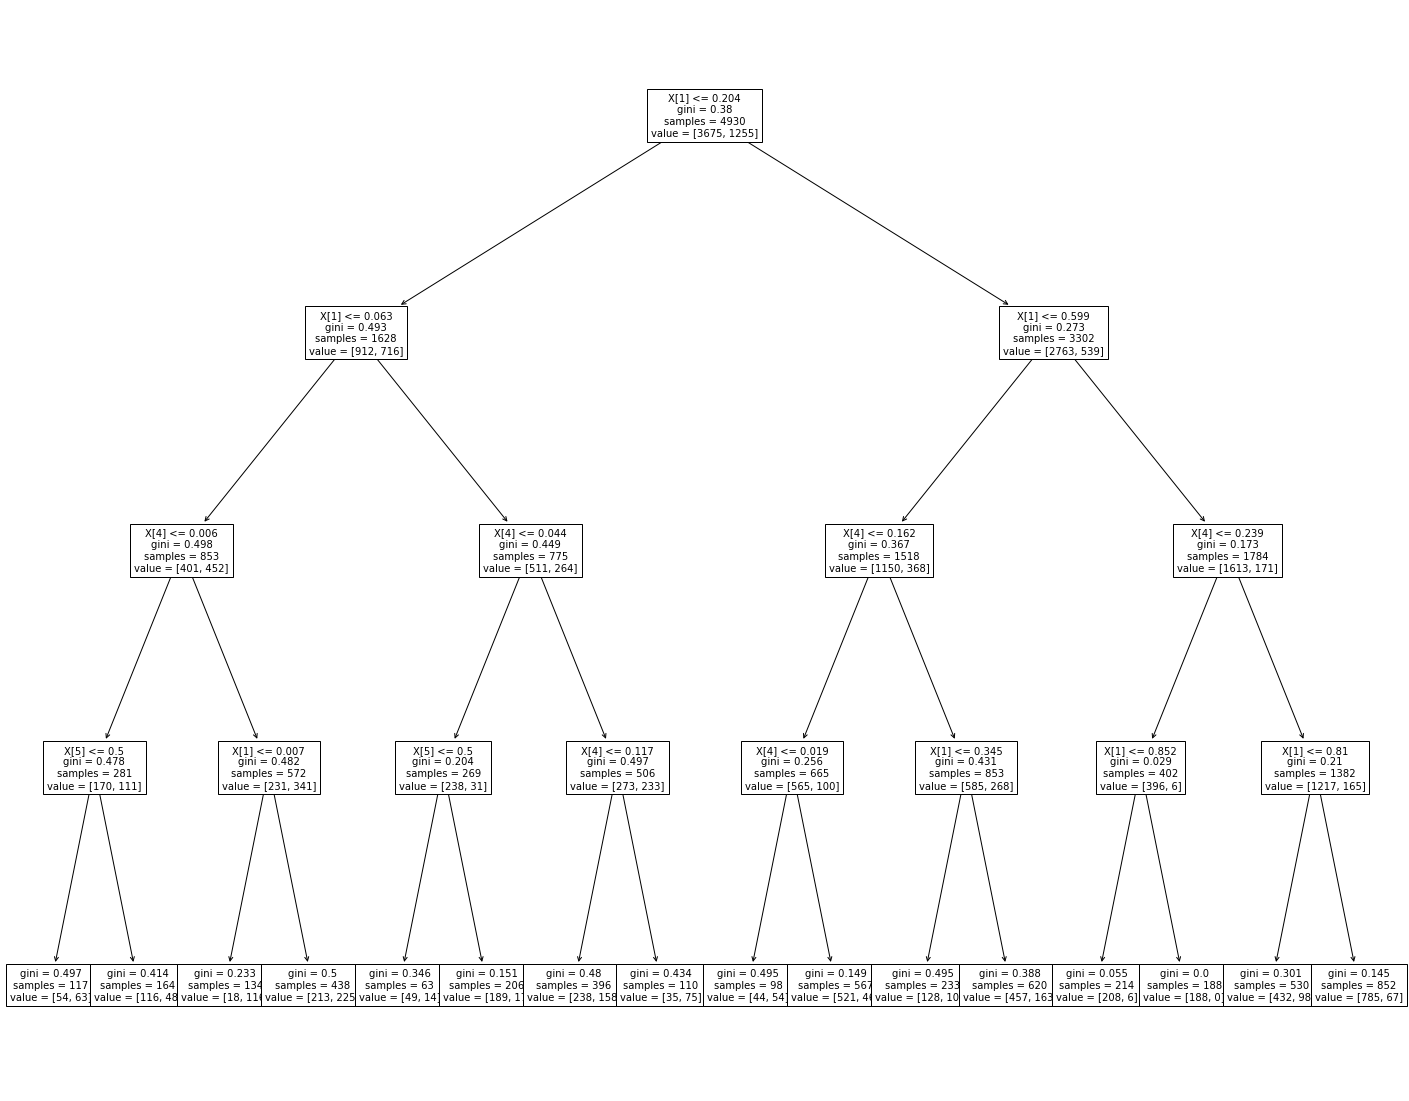

In [334]:
fig, ax = plt.subplots(figsize=(25, 20))
tree.plot_tree(dt, fontsize=10)
plt.show()

In [220]:
conf_mat = metrics.confusion_matrix(y_test,dt.predict(X_test))
print(conf_mat)

[[1348  151]
 [ 374  240]]


In [221]:
confusion_matrices = [
                      ( "Decision Tree Classifier", conf_mat )
                      
                     ]

<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


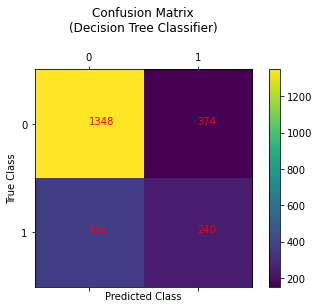

In [222]:
draw_confusion_matrices(confusion_matrices, class_names)

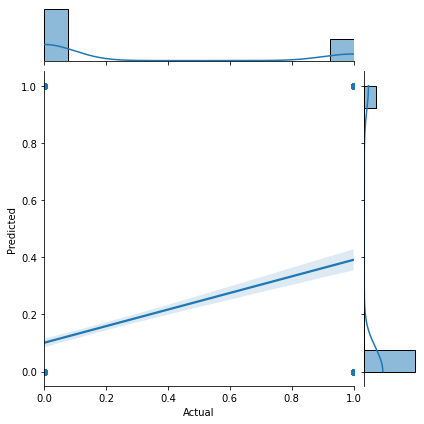

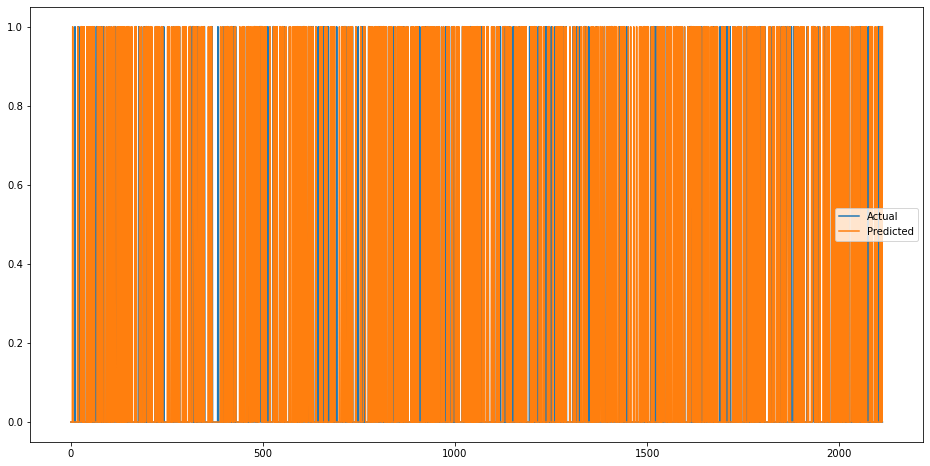

In [225]:
z=dt.predict(X_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test)
plt.legend(['Actual','Predicted'])


## Random Forest Classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rf=RandomForestClassifier(max_depth=7, max_features=6)

In [246]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=6)

In [247]:
rf.score(X_train,y_train)

0.8296146044624746

In [248]:
rf.score(X_test,y_test)

0.7567439659252247

In [253]:
conf_mat = metrics.confusion_matrix(y_test,rf.predict(X_test))
print(conf_mat)

[[1387  112]
 [ 402  212]]


In [ ]:
confusion_matrices = [
                      ( "Random Forest Classifier", conf_mat )
                      
                     ]

<ipython-input-147-9ea6a54cf1bd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-147-9ea6a54cf1bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


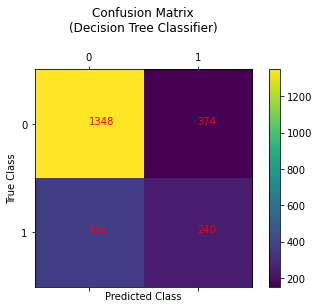

In [254]:
draw_confusion_matrices(confusion_matrices, class_names)

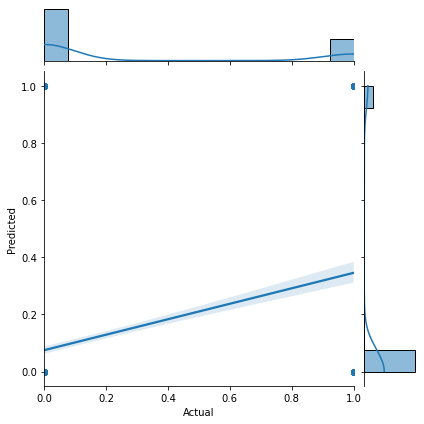

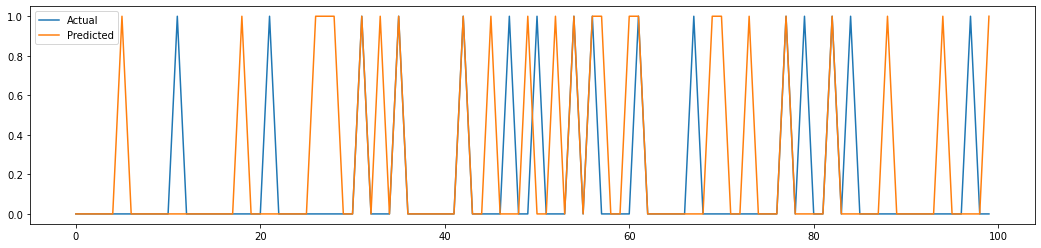

In [255]:
z=rf.predict(X_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(18,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
